In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/Tweets.csv")

In [ ]:
# Find & Remove duplicates
duplicateDFRow = df[df.duplicated(keep=False)]
duplicateDFRow.sort_values("tweet_id", inplace = True)
duplicateDFRow.shape

(72, 15)

In [ ]:
#removing duplicates
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
# New Shape
df.shape

(14604, 15)

# Data Understanding Before Text Pre-Processing

In [ ]:
# function to create labeled barplots

def labeled_barplot(data, feature, hue=None, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    hue: whether to groupby another dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column

    ax = sns.countplot(
        data=data,
        x=feature,
        hue=hue,
        palette='viridis',
        order = data[feature].value_counts().index,
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points"
        )  # annotate the percentage

    plt.show()  # show the plot

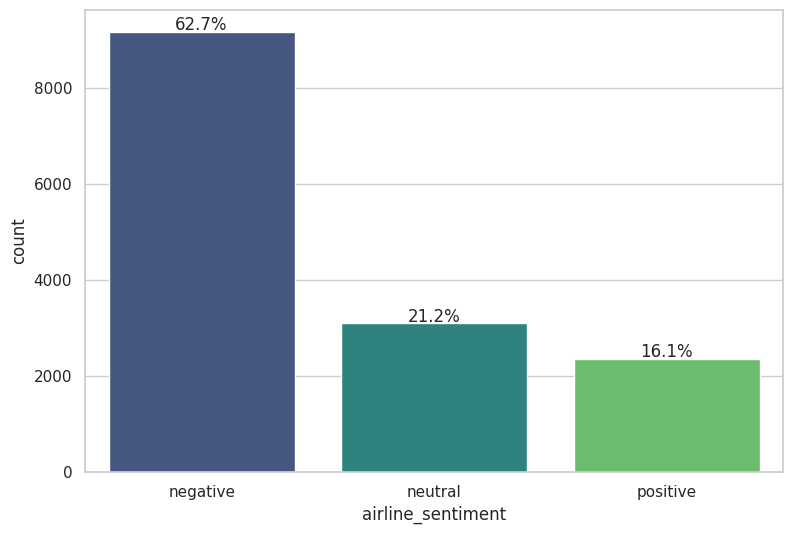

In [ ]:
# Look at the distribution of Target variable: Airline Sentiment
# Set the style to white
# import the figure size for the visualizations
from matplotlib import rcParams
rcParams['figure.figsize'] = 9,6
labeled_barplot(df,'airline_sentiment',perc=True)

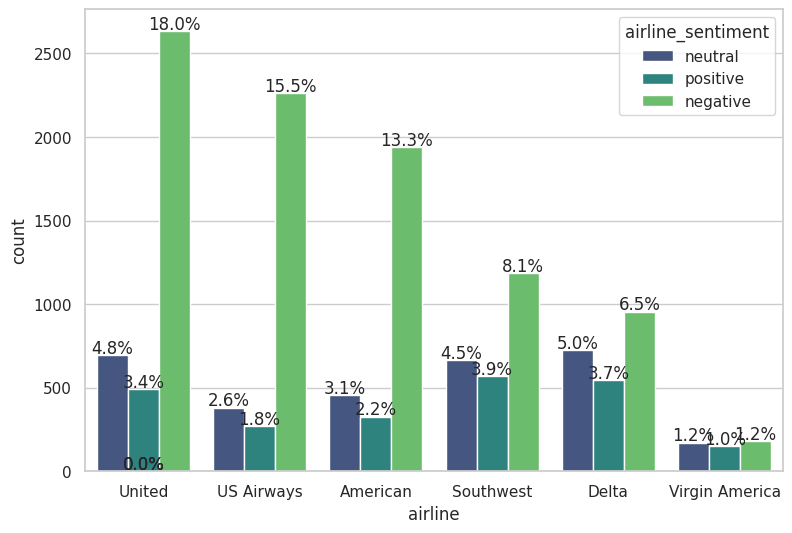

In [ ]:
# create labeled barplot for number of tweets by sentiment per airline
labeled_barplot(df,'airline','airline_sentiment',perc=True)

In [ ]:
# Understanding the data
def plot_bar(title,x_label,y_label,data):
    fig, ax = plt.subplots(figsize=(10, 3))
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.set_ylabel(y_label , fontsize=12)
    ax.set_title(title, fontsize=15, fontweight='bold')
    _=data.plot(kind='bar')

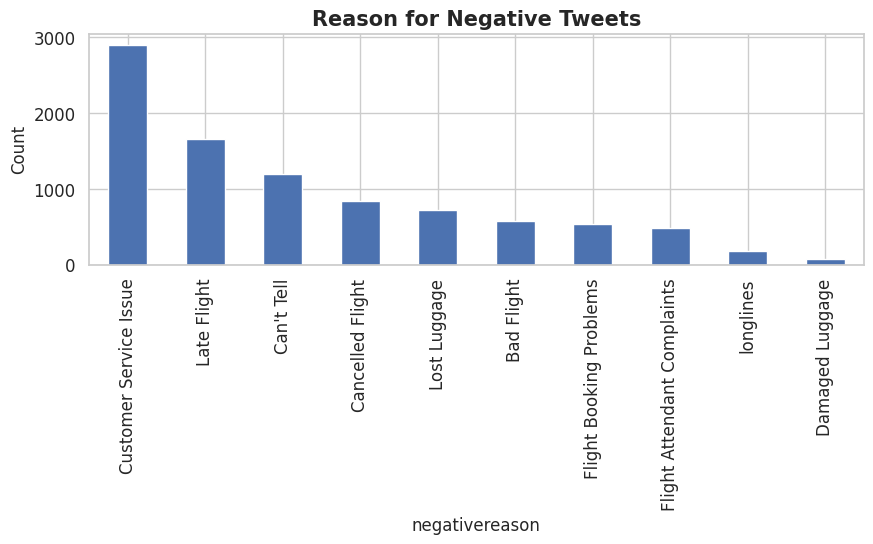

In [ ]:
reason_count = df['negativereason'].value_counts()
plot_bar('Reason for Negative Tweets','Reason','Count',reason_count)

In [ ]:
# Negative tweets X Airline
airline_neg_reason = df.groupby('airline')['negativereason'].value_counts()
airline_neg_reason.unstack()

negativereason  Bad Flight  Can't Tell  Cancelled Flight  \
airline                                                    
American                87         198               242   
Delta                   64         186                51   
Southwest               90         159               162   
US Airways             104         246               189   
United                 216         379               181   
Virgin America          19          22                18   

negativereason  Customer Service Issue  Damaged Luggage  \
airline                                                   
American                           762               12   
Delta                              199               11   
Southwest                          391               14   
US Airways                         811               11   
United                             681               22   
Virgin America                      60                4   

negativereason  Flight Attendant Complaints  Flight Booking Problems  \
airline                                                                
American                                 86                      130   
Delta                                    60                       44   
Southwest                                38                       61   
US Airways                              123                      122   
United                                  168                      144   
Virgin America                            5                       28   

negativereason  Late Flight  Lost Luggage  longlines  
airline                                               
American                244           146         34  
Delta                   269            57         14  
Southwest               152            90         29  
US Airways              453           154         50  
United                  525           269         48  
Virgin America           17             5          3

negativereason  Bad Flight  Can't Tell  Cancelled Flight  \
airline                                                    
American                87         198               242   
Delta                   64         186                51   
Southwest               90         159               162   
US Airways             104         246               189   
United                 216         379               181   
Virgin America          19          22                18   

negativereason  Customer Service Issue  Damaged Luggage  \
airline                                                   
American                           762               12   
Delta                              199               11   
Southwest                          391               14   
US Airways                         811               11   
United                             681               22   
Virgin America                      60                4   

negativereason  Flight Attendant Complaints  F

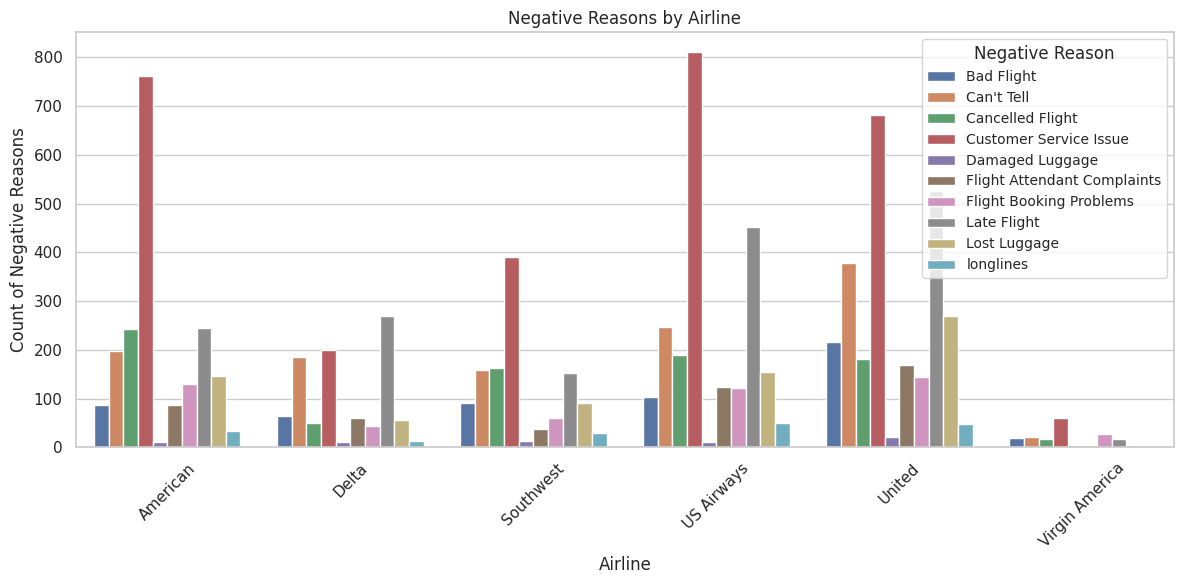

In [ ]:
# Unstacking to reshape for better visualization
airline_neg_reason_df = airline_neg_reason.unstack(fill_value=0)
# Display the reshaped DataFrame
print(airline_neg_reason_df)

# Resetting the index for plotting
airline_neg_reason_df = airline_neg_reason_df.reset_index().melt(id_vars='airline', var_name='negativereason', value_name='count')

# Plotting using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=airline_neg_reason_df, x='airline', y='count', hue='negativereason')
plt.title('Negative Reasons by Airline')
plt.xlabel('Airline')
plt.ylabel('Count of Negative Reasons')
plt.xticks(rotation=45)
plt.legend(title='Negative Reason', fontsize='small')  # Set fontsize to 'small'
plt.tight_layout()
plt.show()

# Text Pre-Processing

In [ ]:
# Select only text & airline sentiment for Data Pre-Processing
df_clean = df[['text','airline_sentiment']]

In [ ]:
df_clean.head()

text airline_sentiment
0                @VirginAmerica What @dhepburn said.           neutral
1  @VirginAmerica plus you've added commercials t...          positive
2  @VirginAmerica I didn't today... Must mean I n...           neutral
3  @VirginAmerica it's really aggressive to blast...          negative
4  @VirginAmerica and it's a really big bad thing...          negative

# Vader Sentiment Scoring

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

In [ ]:
# Function to calculate VADER scores
def vader_score(text):
    scores = sia.polarity_scores(text)
    return scores['compound']  # Return compound score

In [ ]:
# Apply VADER scoring to the 'text' column
df_clean['vader_score'] = df_clean['text'].apply(vader_score)

In [ ]:
df_clean.head()

text airline_sentiment  \
0                @VirginAmerica What @dhepburn said.           neutral   
1  @VirginAmerica plus you've added commercials t...          positive   
2  @VirginAmerica I didn't today... Must mean I n...           neutral   
3  @VirginAmerica it's really aggressive to blast...          negative   
4  @VirginAmerica and it's a really big bad thing...          negative   

   vader_score  
0       0.0000  
1       0.0000  
2       0.0000  
3      -0.5984  
4      -0.5829

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


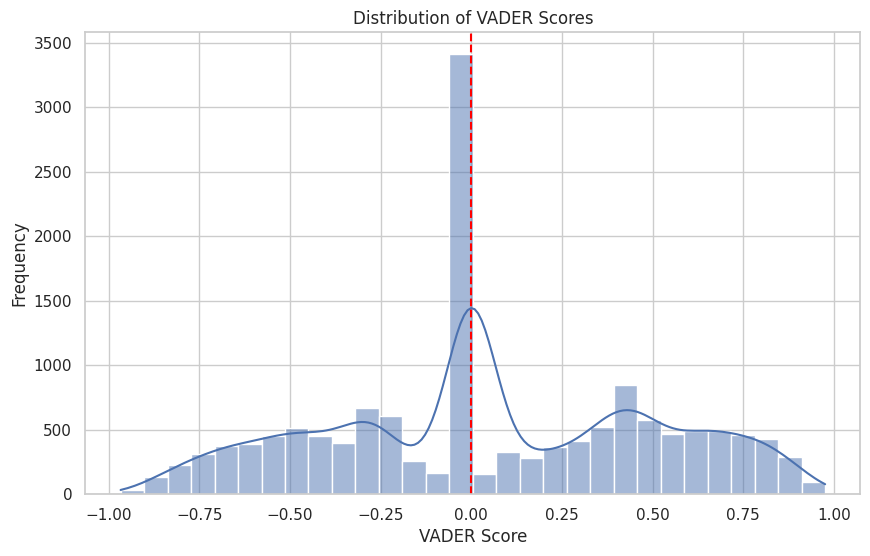

In [ ]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a distribution plot for VADER scores
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['vader_score'], bins=30, kde=True)
plt.title('Distribution of VADER Scores')
plt.xlabel('VADER Score')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')  # Line at 0 for neutral sentiment
plt.show()

In [ ]:
# Recategorise based on Vader Score
#positive sentiment Vader score > 0.001
#neutral sentiment > -0.001 & < 0.001
#negative sentiment Vader score < -0.001

# Create a function
def categorize_sentiment(score):
    if score > 0.001:
        return 'positive'
    elif -0.001 < score < 0.001:
        return 'neutral'
    else:
        return 'negative'


In [ ]:
# Apply categorize_sentiment
df_clean['vader_sentiment'] = df_clean['vader_score'].apply(categorize_sentiment)

In [ ]:
df_clean.head(100)

text airline_sentiment  \
0                 @VirginAmerica What @dhepburn said.           neutral   
1   @VirginAmerica plus you've added commercials t...          positive   
2   @VirginAmerica I didn't today... Must mean I n...           neutral   
3   @VirginAmerica it's really aggressive to blast...          negative   
4   @VirginAmerica and it's a really big bad thing...          negative   
..                                                ...               ...   
95  @VirginAmerica Is it me, or is your website do...          negative   
96  @VirginAmerica I can't check in or add a bag. ...          negative   
97  @VirginAmerica - Let 2 scanned in passengers l...          negative   
98  @virginamerica What is your phone number. I ca...          negative   
99  @VirginAmerica is anyone doing anything there ...          negative   

    vader_score vader_sentiment  
0        0.0000         neutral  
1        0.0000         neutral  
2        0.0000         neutral  
3       -0.5984        negative  
4       -0.5829        negative  
..          ...             ...  
95      -0.5096        negative  
96       0.0000         neutral  
97      -0.0516        negative  
98       0.0772        positive  
99      -0.6124        negative  

[100 rows x 4 columns]

In [ ]:
# Calcualte the count based on vader_sentiment
sentiment_counts = df_clean['vader_sentiment'].value_counts()
print(sentiment_counts)

vader_sentiment
positive    6203
negative    5140
neutral     3261
Name: count, dtype: int64


In [ ]:
# Evalulate Vader Sentiment Scoring
from sklearn.metrics import classification_report, confusion_matrix

# Get true labels and predicted labels
true_labels = df_clean['airline_sentiment']
predicted_labels = df_clean['vader_sentiment']

# Print confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=['positive', 'neutral', 'negative'])
print("Confusion Matrix:")
print(cm)

# Print classification report
report = classification_report(true_labels, predicted_labels, target_names=['positive', 'neutral', 'negative'])
print("Classification Report:")
print(report)

Confusion Matrix:
[[2056  205   93]
 [1354 1306  431]
 [2793 1750 4616]]
Classification Report:
              precision    recall  f1-score   support

    positive       0.90      0.50      0.65      9159
     neutral       0.40      0.42      0.41      3091
    negative       0.33      0.87      0.48      2354

    accuracy                           0.55     14604
   macro avg       0.54      0.60      0.51     14604
weighted avg       0.70      0.55      0.57     14604



In [ ]:
df_clean.head(15)

text airline_sentiment
0                 @VirginAmerica What @dhepburn said.           neutral
1   @VirginAmerica plus you've added commercials t...          positive
2   @VirginAmerica I didn't today... Must mean I n...           neutral
3   @VirginAmerica it's really aggressive to blast...          negative
4   @VirginAmerica and it's a really big bad thing...          negative
5   @VirginAmerica seriously would pay $30 a fligh...          negative
6   @VirginAmerica yes, nearly every time I fly VX...          positive
7   @VirginAmerica Really missed a prime opportuni...           neutral
8     @virginamerica Well, I didn't…but NOW I DO! :-D          positive
9   @VirginAmerica it was amazing, and arrived an ...          positive
10  @VirginAmerica did you know that suicide is th...           neutral
11  @VirginAmerica I &lt;3 pretty graphics. so muc...          positive
12  @VirginAmerica This is such a great deal! Alre...          positive
13  @VirginAmerica @virginmedia I'm flying your #f...          positive
14                             @VirginAmerica Thanks!          positive

In [ ]:
# Calcualte the count based on airline_sentiment
sentiment_counts_1 = df_clean['airline_sentiment'].value_counts()
print(sentiment_counts_1)

airline_sentiment
negative    9159
neutral     3091
positive    2354
Name: count, dtype: int64


In [ ]:
df_clean

text airline_sentiment
3410   @united airlines delayed our flight on the way...          negative
6105   @SouthwestAir Yes - with extra $77. I wonder w...          negative
9649   @USAirways I keep thinking this is a massive p...          negative
2367   @united And then when we asked the stewardess ...          negative
8559   @JetBlue keeps asking me to enter a valid emai...          negative
...                                                  ...               ...
14623  @AmericanAir Love the new planes for the JFK-L...          positive
14625  @AmericanAir Flight 236 was great. Fantastic c...          positive
14628  Thank you. “@AmericanAir: @jlhalldc Customer R...          positive
14630                        @AmericanAir Thanks! He is.          positive
14635  @AmericanAir thank you we got on a different f...          positive

[7062 rows x 2 columns]

In [ ]:
import pandas as pd
import string
import re
import nltk
from nltk.tokenize import word_tokenize
import spacy
import unicodedata
from nltk.stem import PorterStemmer

In [ ]:
# Stopword List
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Initialize the spaCy NLP model and NLTK stemmer
nlp = spacy.load('en_core_web_sm')
stemmer = PorterStemmer()

In [ ]:
# Create stopword list
stopwords = nltk.corpus.stopwords.words('english')

custom_remove_list = ['flight']

stopwords_NEW = set(stopwords).union(custom_remove_list)

In [ ]:
def clean_text(text):
    # Remove Punctuation, URLs, Mentions, Emojis, Digits, Non-ASCII, etc.
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub(r'http[s]?://\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Remove emojis
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.strip().lower()  # Strip and convert to lowercase
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')  # Remove Non-ASCII
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces

    # Tokenization, Lemmatization
    doc = nlp(text)
    cleaned_tokens = []

    for token in doc:
        # Remove stopwords and keep only alphabetic tokens
        if token.text not in stopwords_NEW and token.is_alpha:
            # First apply lemmatization
            lemma = token.lemma_
            # Optionally, you can also apply stemming if needed
            stemmed = stemmer.stem(lemma)
            cleaned_tokens.append(lemma)

    # Return the cleaned tokens as a single string
    return ' '.join(cleaned_tokens)

In [ ]:
# Create a New column for the clean text to the original df
df_clean['clean_text'] = df_clean['text'].apply(clean_text)

In [ ]:
# View the df_clean after cleaning
df_clean.head()

text airline_sentiment  \
0                @VirginAmerica What @dhepburn said.           neutral   
1  @VirginAmerica plus you've added commercials t...          positive   
2  @VirginAmerica I didn't today... Must mean I n...           neutral   
3  @VirginAmerica it's really aggressive to blast...          negative   
4  @VirginAmerica and it's a really big bad thing...          negative   

                                          clean_text  
0                         virginamerica dhepburn say  
1  virginamerica plus add commercial experience t...  
2  virginamerica not today must mean need take an...  
3  virginamerica really aggressive blast obnoxiou...  
4                 virginamerica really big bad thing

In [ ]:
# Visualise the most frequent word (ALL)
from wordcloud import WordCloud
def plotWords(words):
    wordcloud=WordCloud(width=1200, height=600, random_state=21,max_font_size=110).generate(words)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis('off')
    plt.show()

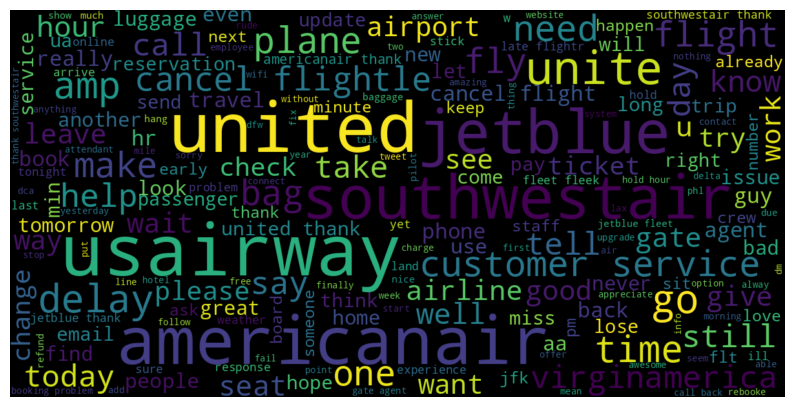

In [ ]:
words = ' '.join(df_clean['clean_text'])
plotWords(words)

In [ ]:
# Encode labels
Negative = 0
Positive = 1
label_map = {
    'negative': Negative,
    'positive': Positive
}

df_clean['airline_sentiment_score'] = df_clean['airline_sentiment'].map(label_map)

In [ ]:
# Focus on only Positive and negative sentiment
df_clean = df_clean[df_clean['airline_sentiment'] != 'neutral']

In [ ]:
df_clean.head()

text airline_sentiment  \
1  @VirginAmerica plus you've added commercials t...          positive   
3  @VirginAmerica it's really aggressive to blast...          negative   
4  @VirginAmerica and it's a really big bad thing...          negative   
5  @VirginAmerica seriously would pay $30 a fligh...          negative   
6  @VirginAmerica yes, nearly every time I fly VX...          positive   

                                          clean_text  airline_sentiment_score  
1  virginamerica plus add commercial experience t...                      1.0  
3  virginamerica really aggressive blast obnoxiou...                      0.0  
4                 virginamerica really big bad thing                      0.0  
5  virginamerica seriously would pay seat not pla...                      0.0  
6  virginamerica yes nearly every time fly vx ear...                      1.0

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['airline_sentiment_score'].plot(kind='hist', bins=20, title='airline_sentiment_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('airline_sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('clean_text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='airline_sentiment_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['airline_sentiment_score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('text')):
  _plot_series(series, series_name, i)
  fig.legend(title='text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('airline_sentiment_score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['airline_sentiment_score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('airline_sentiment')):
  _plot_series(series, series_name, i)
  fig.legend(title='airline_sentiment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('airline_sentiment_score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['airline_sentiment_score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('clean_text')):
  _plot_series(series, series_name, i)
  fig.legend(title='clean_text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('airline_sentiment_score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('text')):
  _plot_series(series, series_name, i)
  fig.legend(title='text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_10['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['airline_sentiment_score'].plot(kind='line', figsize=(8, 4), title='airline_sentiment_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['airline_sentiment'].value_counts()
    for x_label, grp in _df_12.groupby('text')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('text')
_ = plt.ylabel('airline_sentiment')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['clean_text'].value_counts()
    for x_label, grp in _df_13.groupby('airline_sentiment')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('airline_sentiment')
_ = plt.ylabel('clean_text')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='index', y='text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['airline_sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='index', y='airline_sentiment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['clean_text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='index', y='clean_text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='airline_sentiment_score', y='text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# See the shape of df_clean
df_clean.shape

(11513, 4)

In [ ]:
# Word cloud for Positive sentiment
from wordcloud import WordCloud

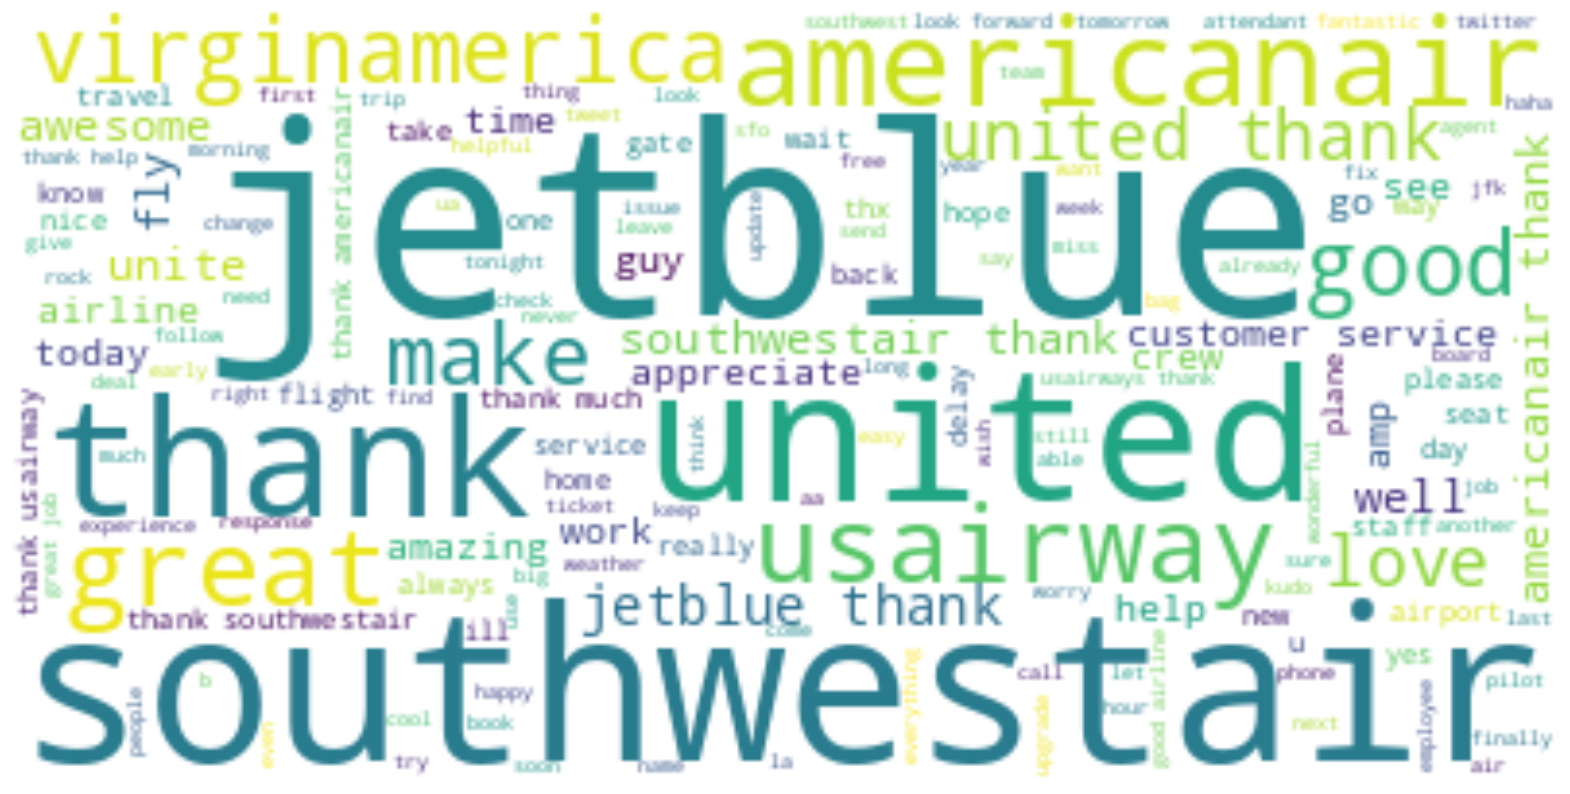

In [ ]:
# Positive cloud
positive_tweets = df_clean[df_clean['airline_sentiment_score'] == 1.0]
positive_text = ' '.join(positive_tweets['clean_text'])

wordcloud = WordCloud(background_color="white").generate(positive_text)

plt.figure(figsize = (20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

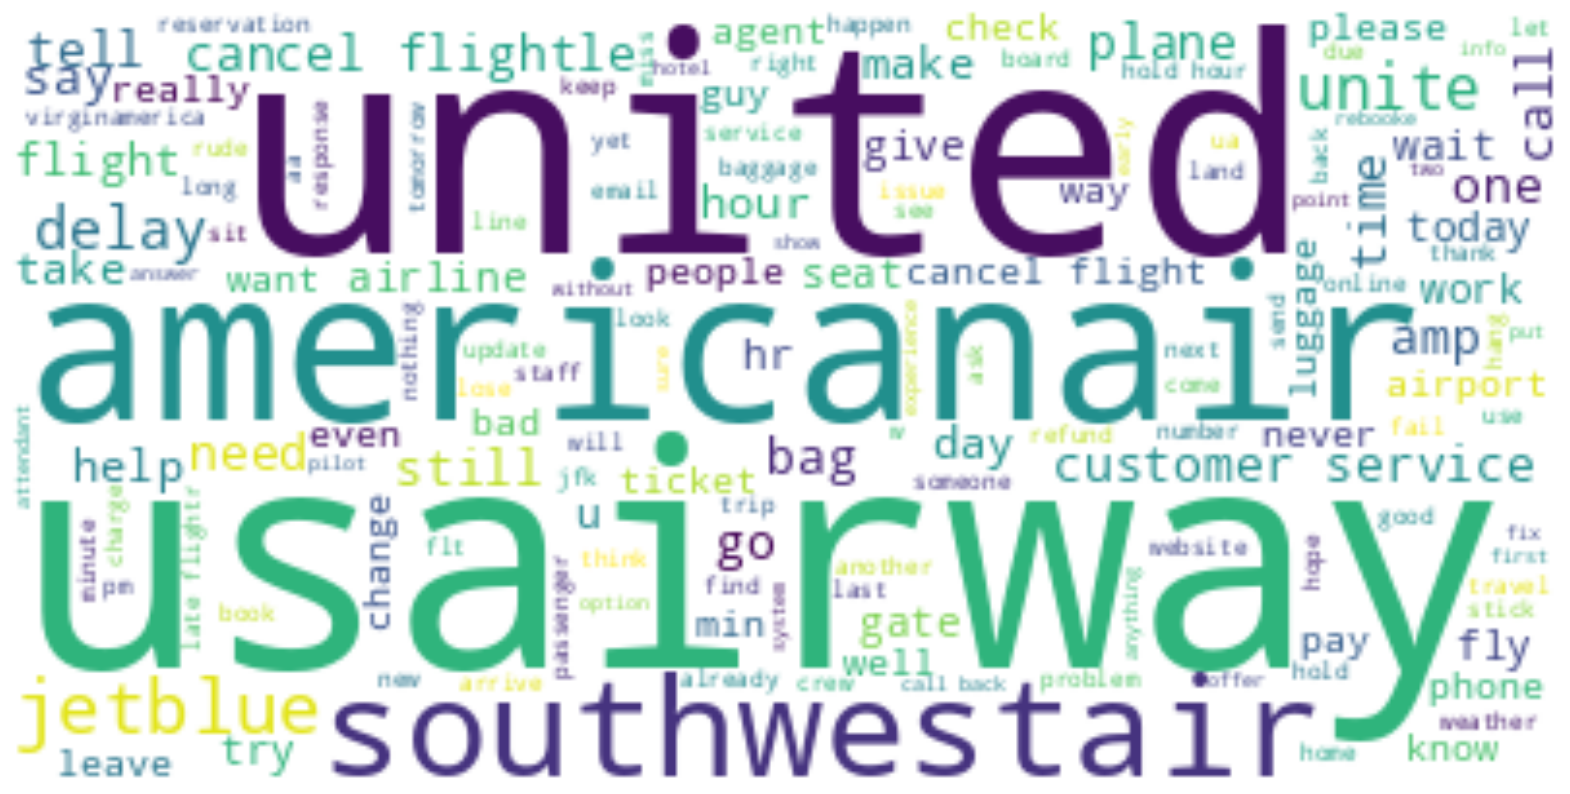

In [ ]:
# Negative cloud
negative_tweets = df_clean[df_clean['airline_sentiment_score'] == 0.0]
negative_text = ' '.join(negative_tweets['clean_text'])

wordcloud = WordCloud(background_color="white").generate(negative_text)

plt.figure(figsize = (20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Text Exploratory Data Analysis : TFIDF

In [ ]:
# TFIDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english', min_df=5, lowercase=True, max_features=100)

In [ ]:
# Prepare TF-IDF features
X = vectorizer.fit_transform(df_clean['clean_text'])
y = df_clean['airline_sentiment_score']

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import normalize
# Set up K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Lists to store results
accuracies = []

# K-Fold Cross-Validation with normalization
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index].toarray(), X[val_index].toarray()  # Convert sparse to dense
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]  # Use .iloc for indexing

    # Apply L2 normalization
    X_train_normalized = normalize(X_train, norm='l2')
    X_val_normalized = normalize(X_val, norm='l2')

In [ ]:
# Initialize model from Logistic regression to test the accuracy of TFIDF
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Train the model
model.fit(X_train_normalized, y_train)

# Make predictions
y_pred = model.predict(X_val_normalized)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
accuracies.append(accuracy)

In [ ]:
# Calculate and print average accuracy
average_accuracy = sum(accuracies) / len(accuracies)
print(f'Average Accuracy across all folds: {average_accuracy:.4f}')

Average Accuracy across all folds: 0.8771


In [ ]:
# Print classification report for each fold
print(f'Fold Classification Report:\n{classification_report(y_val, y_pred)}')

Fold Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      1816
         1.0       0.81      0.55      0.65       486

    accuracy                           0.88      2302
   macro avg       0.85      0.76      0.79      2302
weighted avg       0.87      0.88      0.87      2302



In [ ]:
# Separate the tweet
positive_tweets = df_clean[df_clean['airline_sentiment'] == 'positive']['clean_text']
negative_tweets = df_clean[df_clean['airline_sentiment'] == 'negative']['clean_text']

In [ ]:
# Vectorize positive and negative_tweets
positive_tweets_vectorized = vectorizer.fit_transform(positive_tweets)
negative_tweets_vectorized = vectorizer.fit_transform(negative_tweets)

In [ ]:
feature_names = vectorizer.get_feature_names_out()
# Sum up the TF-IDF scores for each word
positive_word_frequencies = positive_tweets_vectorized.sum(axis=0)
negative_word_frequencies = negative_tweets_vectorized.sum(axis=0)

In [ ]:
# Create dictionaries for word frequencies
positive_word_freq_dict = dict(zip(feature_names, positive_word_frequencies.A1))  # .A1 for a flat array
negative_word_freq_dict = dict(zip(feature_names, negative_word_frequencies.A1))

In [ ]:
# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(positive_word_freq_dict)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(negative_word_freq_dict)

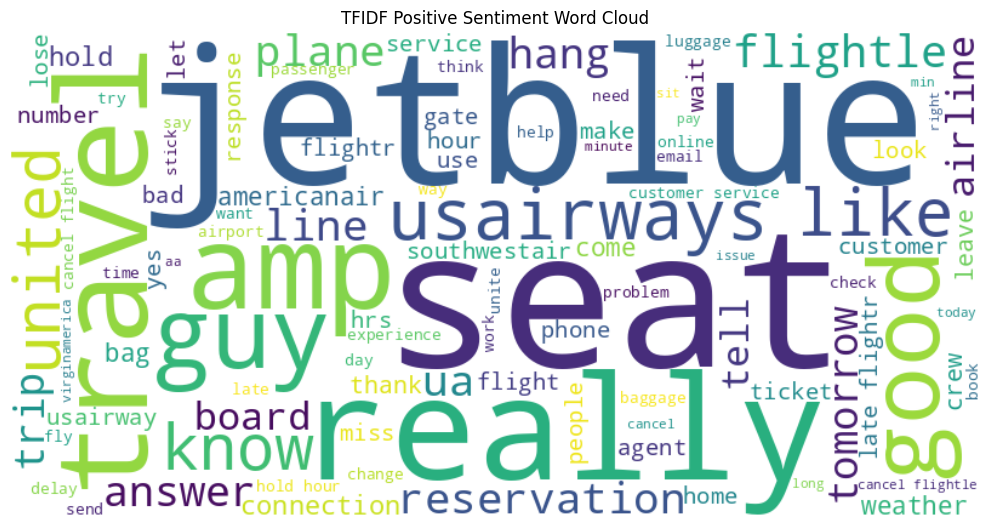

In [ ]:
# Visualize TFID positive word cloud before normalised
plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('TFIDF Positive Sentiment Word Cloud')
plt.tight_layout()
plt.show()

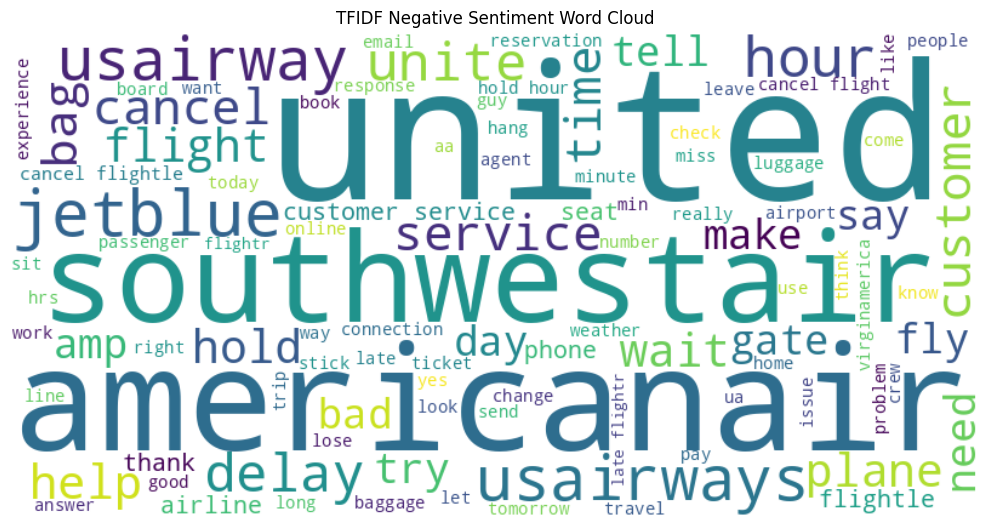

In [ ]:
# Visualize TFID negative word cloud before normalised
plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('TFIDF Negative Sentiment Word Cloud')
plt.tight_layout()
plt.show()

In [ ]:
# Perform L2 normalization
positive_tweets_normalized = normalize(positive_tweets_vectorized, norm='l2')
negative_tweets_normalized = normalize(negative_tweets_vectorized, norm='l2')

In [ ]:
# View after L2 normalisation
positive_word_frequencies_normalized = positive_tweets_normalized.sum(axis=0)
negative_word_frequencies_normalized = negative_tweets_normalized.sum(axis=0)

In [ ]:
# Visualise the positive_word_frequencies_normalized & negative_word_frequencies_normalized
# Create dictionaries for word frequencies
positive_word_freq_dict_norm = dict(zip(feature_names, positive_word_frequencies_normalized.A1))  # .A1 for a flat array
negative_word_freq_dict_norm = dict(zip(feature_names, negative_word_frequencies_normalized.A1))

In [ ]:
# Generate word clouds
positive_wordcloud_norm = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(positive_word_freq_dict_norm)
negative_wordcloud_norm = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(negative_word_freq_dict_norm)

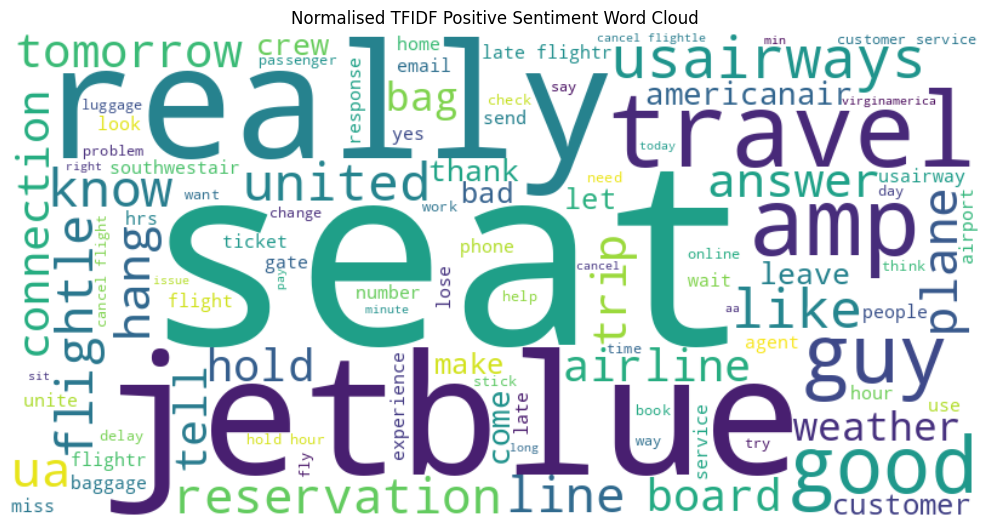

In [ ]:
# Visualize TFID positive word cloud after normalised
plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud_norm, interpolation='bilinear')
plt.axis('off')
plt.title('Normalised TFIDF Positive Sentiment Word Cloud')
plt.tight_layout()
plt.show()

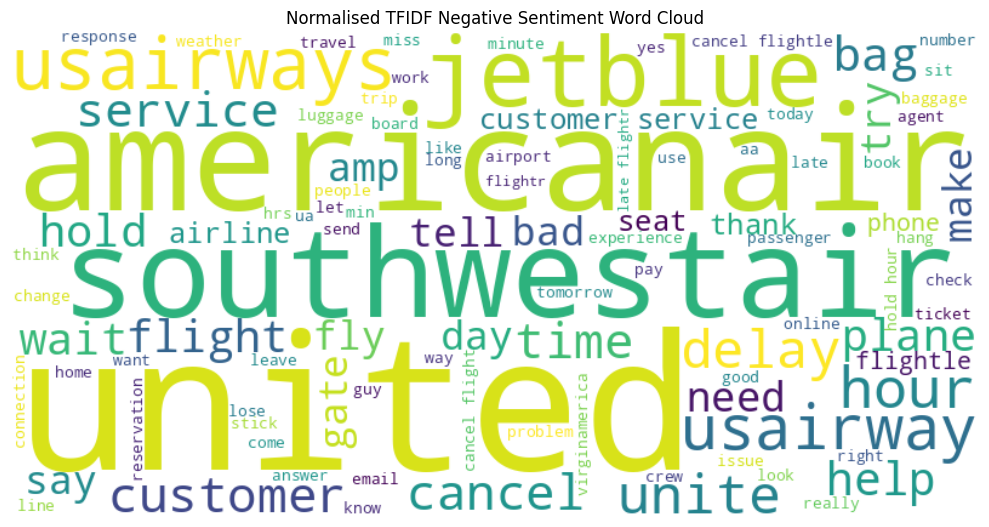

In [ ]:
# Visualize TFID Negative word cloud after normalised
plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud_norm, interpolation='bilinear')
plt.axis('off')
plt.title('Normalised TFIDF Negative Sentiment Word Cloud')
plt.tight_layout()
plt.show()

# Feature Exploration:
# Positive BERTopic

In [ ]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.6 MB/s eta 0:00:00


In [ ]:
from bertopic import BERTopic
from bertopic.backend import BaseEmbedder
from bertopic.cluster import BaseCluster
from bertopic.vectorizers import ClassTfidfTransformer
from bertopic.dimensionality import BaseDimensionalityReduction
from umap import UMAP

In [ ]:
umap_model = UMAP(n_neighbors=15, n_components=5, metric='cosine')

In [ ]:
# Fit BERTopic on positive tweets
topic_model_positive = BERTopic(
    verbose=True,
    embedding_model="paraphrase-MiniLM-L12-v2",
    # dimensionality reduction
    )

topics_positive, probs_positive = topic_model_positive.fit_transform(positive_tweets)

2024-10-31 06:27:40,356 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/74 [00:00<?, ?it/s]

2024-10-31 06:28:31,977 - BERTopic - Embedding - Completed ✓
2024-10-31 06:28:31,980 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-10-31 06:28:54,748 - BERTopic - Dimensionality - Completed ✓
2024-10-31 06:28:54,750 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-10-31 06:28:54,839 - BERTopic - Cluster - Completed ✓
2024-10-31 06:28:54,846 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-10-31 06:28:54,911 - BERTopic - Representation - Completed ✓


In [ ]:
# Extract the TF-IDF model
tfidf_model_positive = topic_model_positive.vectorizer_model

In [ ]:
# To inspect the TF-IDF features
tfidf_features_positive = tfidf_model_positive.get_feature_names_out()

In [ ]:
# Get the TF-IDF matrix (use the transform method)
tfidf_matrix_positive = tfidf_model_positive.transform(positive_tweets)

In [ ]:
# Calculate the mean TF-IDF score for each term across all documents
mean_tfidf_scores_positive = tfidf_matrix_positive.mean(axis=0).A1  # A1 converts to a 1D

In [ ]:
# Create a dictionary of terms and their corresponding mean TF-IDF scores
tfidf_dict_positive = dict(zip(tfidf_features_positive, mean_tfidf_scores_positive))

In [ ]:
# Optionally, sort the dictionary by TF-IDF score
sorted_tfidf_dict_positive = dict(sorted(tfidf_dict_positive.items(), key=lambda item: item[1], reverse=True))

In [ ]:
# Display the top N terms (e.g., top 20)
top_n = 20
top_tfidf_terms_positive = {k: sorted_tfidf_dict_positive[k] for k in list(sorted_tfidf_dict_positive)[:top_n]}

In [ ]:
# Print the top positive TF-IDF terms
print("Top TF-IDF Terms for Positive Tweets:")
for term, score in top_tfidf_terms_positive.items():
    print(f"{term}: {score:.4f}")

Top TF-IDF Terms for Positive Tweets:
thank: 0.4308
jetblue: 0.2519
southwestair: 0.2438
united: 0.1801
americanair: 0.1466
get: 0.1079
great: 0.0998
good: 0.0901
service: 0.0688
virginamerica: 0.0663
make: 0.0650
usairways: 0.0646
love: 0.0641
fly: 0.0620
usairway: 0.0531
customer: 0.0523
guy: 0.0518
not: 0.0501
help: 0.0480
much: 0.0459


In [ ]:
topic_model_positive.visualize_barchart()

In [ ]:
topic_model_positive.visualize_term_rank()

In [ ]:
topic_model_positive.visualize_hierarchy()

In [ ]:
topic_model_positive.visualize_heatmap()

In [ ]:
topic_model_positive.visualize_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# Negative BERTopic

In [ ]:
# Fit BERTopic on negative tweets
topic_model_negative = BERTopic(verbose=True, embedding_model="paraphrase-MiniLM-L12-v2")
topics_negative, probs_negative = topic_model_negative.fit_transform(negative_tweets)

2024-10-31 06:30:18,367 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/287 [00:00<?, ?it/s]

2024-10-31 06:33:43,075 - BERTopic - Embedding - Completed ✓
2024-10-31 06:33:43,077 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-10-31 06:34:25,213 - BERTopic - Dimensionality - Completed ✓
2024-10-31 06:34:25,218 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-10-31 06:34:25,670 - BERTopic - Cluster - Completed ✓
2024-10-31 06:34:25,679 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-10-31 06:34:25,882 - BERTopic - Representation - Completed ✓


In [ ]:
# Extract the Negative TF-IDF model
tfidf_model_negative = topic_model_negative.vectorizer_model

In [ ]:
# To inspect the TF-IDF features
tfidf_features_negative = tfidf_model_negative.get_feature_names_out()

In [ ]:
# Get the TF-IDF matrix (use the transform method)
tfidf_matrix_negative = tfidf_model_negative.transform(negative_tweets)

In [ ]:
# Calculate the mean TF-IDF score for each term across all documents
mean_tfidf_scores_negative = tfidf_matrix_negative.mean(axis=0).A1  # A1 converts to a 1D

In [ ]:
# Create a dictionary of terms and their corresponding mean TF-IDF scores
tfidf_dict_negative = dict(zip(tfidf_features_negative, mean_tfidf_scores_negative))

In [ ]:
# Optionally, sort the dictionary by TF-IDF score
sorted_tfidf_dict_negative = dict(sorted(tfidf_dict_negative.items(), key=lambda item: item[1], reverse=True))

In [ ]:
# Display the top N terms (e.g., top 20)
top_n = 15
top_tfidf_terms_negative= {k: sorted_tfidf_dict_negative[k] for k in list(sorted_tfidf_dict_negative)[:top_n]}

In [ ]:
# Print the top Negative TF-IDF terms
print("Top TF-IDF Terms for Negative Tweets:")
for term, score in top_tfidf_terms_negative.items():
    print(f"{term}: {score:.4f}")

Top TF-IDF Terms for Negative Tweets:
united: 0.2346
americanair: 0.2276
not: 0.2098
get: 0.1607
usairways: 0.1343
southwestair: 0.1323
usairway: 0.1249
hour: 0.1193
jetblue: 0.1149
cancel: 0.0991
delay: 0.0959
customer: 0.0842
service: 0.0835
unite: 0.0806
time: 0.0797


In [ ]:
topic_model_negative.visualize_barchart()

In [ ]:
topic_model_negative.visualize_term_rank()

In [ ]:
topic_model_negative.visualize_hierarchy()

In [ ]:
topic_model_negative.visualize_heatmap()

In [ ]:
topic_model_negative.visualize_topics()

## Evaulate BERTopic using coherence score

In [ ]:
!pip install gensim

In [ ]:
from gensim.models import CoherenceModel
import gensim
from gensim.corpora import Dictionary

In [ ]:
# Get the topic-word matrix from the Positive BERTopic model
topic_word_matrix_positive = topic_model_positive.get_topics()

# Get the topic-word matrix from the Negative BERTopic model
topic_word_matrix_negative = topic_model_negative.get_topics()

In [ ]:
# Function to calculate coherence score
def calculate_coherence(topic_model, texts):
    # Get the topics from the BERTopic model
    topics = topic_model.get_topics()

    # Create a list to hold the words for each topic
    topic_words = []
    for topic_id, words in topics.items():
        topic_words.append([word for word, _ in words])  # Extract just the words

    # Create a Gensim dictionary
    dictionary = Dictionary()

    # Tokenize the input texts
    tokenized_texts = [text.split() for text in texts]

    # Add documents to the dictionary
    dictionary.add_documents(tokenized_texts)  # Add tokenized texts to the dictionary

    # Create a corpus from the tokenized texts
    corpus = [dictionary.doc2bow(text) for text in tokenized_texts]  # Ensure texts is a list of lists

    # Calculate coherence score
    coherence_model = CoherenceModel(topics=topic_words, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    return coherence_score

In [ ]:
# Prepare lists of cleaned tweets
positive_tweets_list = df_clean[df_clean['airline_sentiment'] == 'positive']['clean_text'].tolist()
negative_tweets_list = df_clean[df_clean['airline_sentiment'] == 'negative']['clean_text'].tolist()

In [ ]:
# Calculate coherence scores for positive and negative tweets
positive_coherence = calculate_coherence(topic_model_positive, positive_tweets_list)
negative_coherence = calculate_coherence(topic_model_negative, negative_tweets_list)

In [ ]:
# Print the coherence scores
print(f'Positive Tweets Coherence Score: {positive_coherence}')
print(f'Negative Tweets Coherence Score: {negative_coherence}')

Positive Tweets Coherence Score: 0.3407064669701781
Negative Tweets Coherence Score: 0.37796383278095824


## Evaulate BERTopic using Silhouette score

In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
topic_model_negative.embedding_model = SentenceTransformer("paraphrase-MiniLM-L12-v2")

In [ ]:
topics_negative, probs_negative = topic_model_negative.fit_transform(negative_tweets_list)

2024-10-31 06:38:27,995 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/287 [00:00<?, ?it/s]

2024-10-31 06:42:29,731 - BERTopic - Embedding - Completed ✓
2024-10-31 06:42:29,733 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-10-31 06:42:48,017 - BERTopic - Dimensionality - Completed ✓
2024-10-31 06:42:48,019 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-10-31 06:42:48,437 - BERTopic - Cluster - Completed ✓
2024-10-31 06:42:48,445 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-10-31 06:42:48,668 - BERTopic - Representation - Completed ✓


In [ ]:
from bertopic import BERTopic

In [ ]:
# Step 3: Extract document embeddings
embeddings_negative = topic_model_negative.topic_embeddings_

In [ ]:
embeddings_negative[:4]

array([[ 0.01057491,  0.00533463, -0.07488777, ..., -0.11382806,
        -0.23017177,  0.21859072],
       [ 0.04580462, -0.16387303, -0.09132925, ...,  0.02382797,
        -0.31364202,  0.30744436],
       [ 0.16038609,  0.15424606, -0.10647139, ..., -0.15095165,
        -0.24051276,  0.05406928],
       [ 0.01847944,  0.14745267, -0.15141785, ..., -0.21817802,
        -0.24141455,  0.1669504 ]], dtype=float32)

In [ ]:
from sklearn.cluster import KMeans

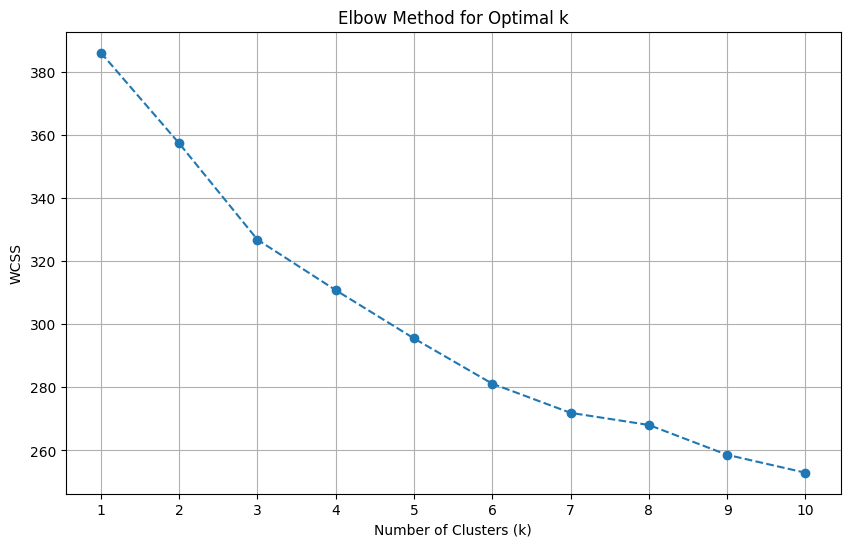

In [ ]:
# Use Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(embeddings_negative)
    wcss.append(kmeans.inertia_)
# Plotting the WCSS to visualize the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

In [ ]:
# Step 3: Apply KMeans clustering
Negative_num_clusters = len(set(topics_negative)) - 1  # Exclude outliers if necessary
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(embeddings_negative)

KMeans(n_clusters=5, random_state=42)

In [ ]:
# Get the cluster labels
Negative_cluster_labels = kmeans.labels_

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
# Step 4: Calculate the silhouette score

if len(set(Negative_cluster_labels)) > 1:  # Ensure there are multiple clusters
    silhouette_negative_avg = silhouette_score(embeddings_negative, Negative_cluster_labels)
else:
    silhouette_negative_avg = None  # Not enough clusters

In [ ]:
# Output the silhouette score
print(f'Silhouette Score for Negative Model: {silhouette_negative_avg}')

Silhouette Score for Negative Model: 0.052523575723171234


In [ ]:
# Step 3: Extract document embeddings
embeddings_positive = topic_model_positive.topic_embeddings_

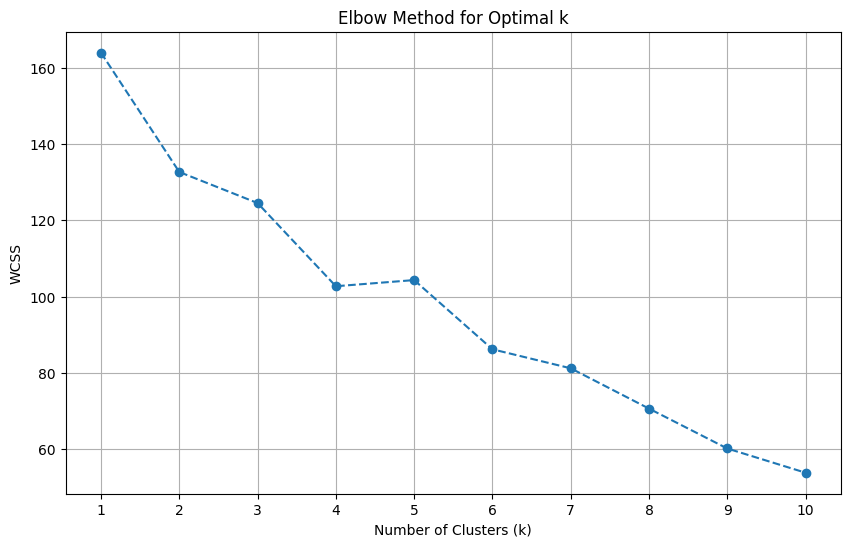

In [ ]:
# Use Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(embeddings_positive)
    wcss.append(kmeans.inertia_)
# Plotting the WCSS to visualize the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

In [ ]:
# Step 3: Apply KMeans clustering
positive_num_clusters = len(set(topics_positive)) - 1  # Exclude outliers if necessary
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(embeddings_positive)

KMeans(n_clusters=6, random_state=42)

In [ ]:
# Get the cluster labels
positive_cluster_labels = kmeans.labels_

In [ ]:
# Step 4: Calculate the silhouette score
if len(set(positive_cluster_labels)) > 1:  # Ensure there are multiple clusters
    silhouette_positive_avg = silhouette_score(embeddings_positive, positive_cluster_labels)
else:
    silhouette_positive_avg = None  # Not enough clusters

In [ ]:
# Output the silhouette score
print(f'Silhouette Score for Positive Model: {silhouette_positive_avg}')

Silhouette Score for Positive Model: 0.11017145216464996


# Normalised Negative TFIDF to Latent Dirichlet Allocation (LDA)

In [ ]:
# Normalised with L2 to negative_tweets
negative_tweets_normalized = normalize(negative_tweets_vectorized, norm='l2')

In [ ]:
search_params = {
    'n_components': [5, 10, 15],  # Number of topics (K)
    'doc_topic_prior': [0.1, 0.5, 1.0],  # Alpha (ɑ) - Document-Topic density
    'topic_word_prior': [0.01, 0.1, 0.5],  # Beta (β) - Topic-Word density
    'learning_decay': [0.5, 0.7, 0.9],
    'learning_offset': [10.0, 20.0, 30.0],
    'max_iter': [10, 20, 30]  # Number of iterations for convergence
}

In [ ]:
# Step 6: Initialize negative LDA model
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import RandomizedSearchCV
for i in range(5):  # Example: testing 5 different random states
    lda = LatentDirichletAllocation(random_state=i)
    lda.fit(negative_tweets_normalized)

In [ ]:
# Initialize RandomizedSearchCV
negative_LDA_random_search = RandomizedSearchCV(
    lda,
    param_distributions=search_params,
    n_iter=5,  # Number of parameter settings to sample
    n_jobs=-1,  # Use all available cores
    cv=3,  # Cross-validation
    verbose=1,
    random_state=42
)

In [ ]:
# Fit Negative RandomizedSearchCV
negative_LDA_random_search.fit(negative_tweets_normalized)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=LatentDirichletAllocation(random_state=4),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'doc_topic_prior': [0.1, 0.5, 1.0],
                                        'learning_decay': [0.5, 0.7, 0.9],
                                        'learning_offset': [10.0, 20.0, 30.0],
                                        'max_iter': [10, 20, 30],
                                        'n_components': [5, 10, 15],
                                        'topic_word_prior': [0.01, 0.1, 0.5]},
                   random_state=42, verbose=1)

In [ ]:
# Find Best Negative LDA model parameter
negative_LDA_parm = negative_LDA_random_search.best_estimator_

In [ ]:
print(negative_LDA_parm)

LatentDirichletAllocation(doc_topic_prior=0.5, learning_decay=0.5,
                          learning_offset=20.0, n_components=5, random_state=4,
                          topic_word_prior=0.01)


In [ ]:
# Print the topics
topic_words = {}
for idx, topic in enumerate(negative_LDA_parm.components_):
    top_feature_indices = topic.argsort()[-5:][::-1]  # Get top 5 terms for each topic
    topic_words[idx] = [vectorizer.get_feature_names_out()[i] for i in top_feature_indices]
    print(f"Topic {idx + 1}: {', '.join(topic_words[idx])}")

Topic 1: usairway, wait, cancel, gate, flightle
Topic 2: americanair, southwestair, help, fly, tell
Topic 3: delay, make, day, thank, hour
Topic 4: united, customer, service, flight, customer service
Topic 5: jetblue, usairways, hold, need, say


In [ ]:
!pip install --upgrade pyLDAvis scikit-learn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Using cached pyLDAvis-3.4.1-py3-none-any.whl.metadata (4.2 kB)
Using cached pyLDAvis-3.4.1-py3-none-any.whl (2.6 MB)
  Attempting uninstall: pyLDAvis
    Found existing installation: pyLDAvis 3.2.2
    Uninstalling pyLDAvis-3.2.2:
      Successfully uninstalled pyLDAvis-3.2.2


In [ ]:
!pip install --upgrade gensim

In [ ]:
print(gensim.__version__)
print(pyLDAvis.__version__)

4.3.3
3.4.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Gensim to visualise pyLDAvis
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
import gensim
from gensim import corpora
import pyLDAvis
import pyLDAvis.gensim_models # Use this for Gensim >= 4.0

In [ ]:
# Step 1: Load your DataFrame
negative_tweets = df_clean[df_clean['airline_sentiment'] == 'negative']['clean_text']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Step 2: Tokenize the negative tweets
neg_texts = [tweet.split() for tweet in negative_tweets]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Step 3: Create a dictionary and corpus
neg_dictionary = corpora.Dictionary(neg_texts)
neg_corpus = [neg_dictionary.doc2bow(text) for text in neg_texts]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Step 4: Train the LDA model using Gensim
num_topics = 5  # Based on your the best Paramaters
neg_lda_model = gensim.models.LdaModel(neg_corpus, num_topics=num_topics, id2word=neg_dictionary, passes=10, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Step 5: Visualize with pyLDAvis
vis_neg_lda = pyLDAvis.gensim_models.prepare(neg_lda_model, neg_corpus, neg_dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Display the visualization
pyLDAvis.enable_notebook()
pyLDAvis.display(vis_neg_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Visualise Negative Latent Dirichlet Allocation
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Step 1: Obtain topic distributions
negative_topic_distribution = negative_LDA_parm.transform(negative_tweets_normalized)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Step 2: Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
neg_tsne_results = tsne.fit_transform(negative_topic_distribution)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Step 3: Create a DataFrame for visualization
neg_tsne_df = pd.DataFrame(neg_tsne_results, columns=['x', 'y'])
neg_tsne_df['topic'] = negative_topic_distribution.argmax(axis=1)  # Assign the topic with the highest probability

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



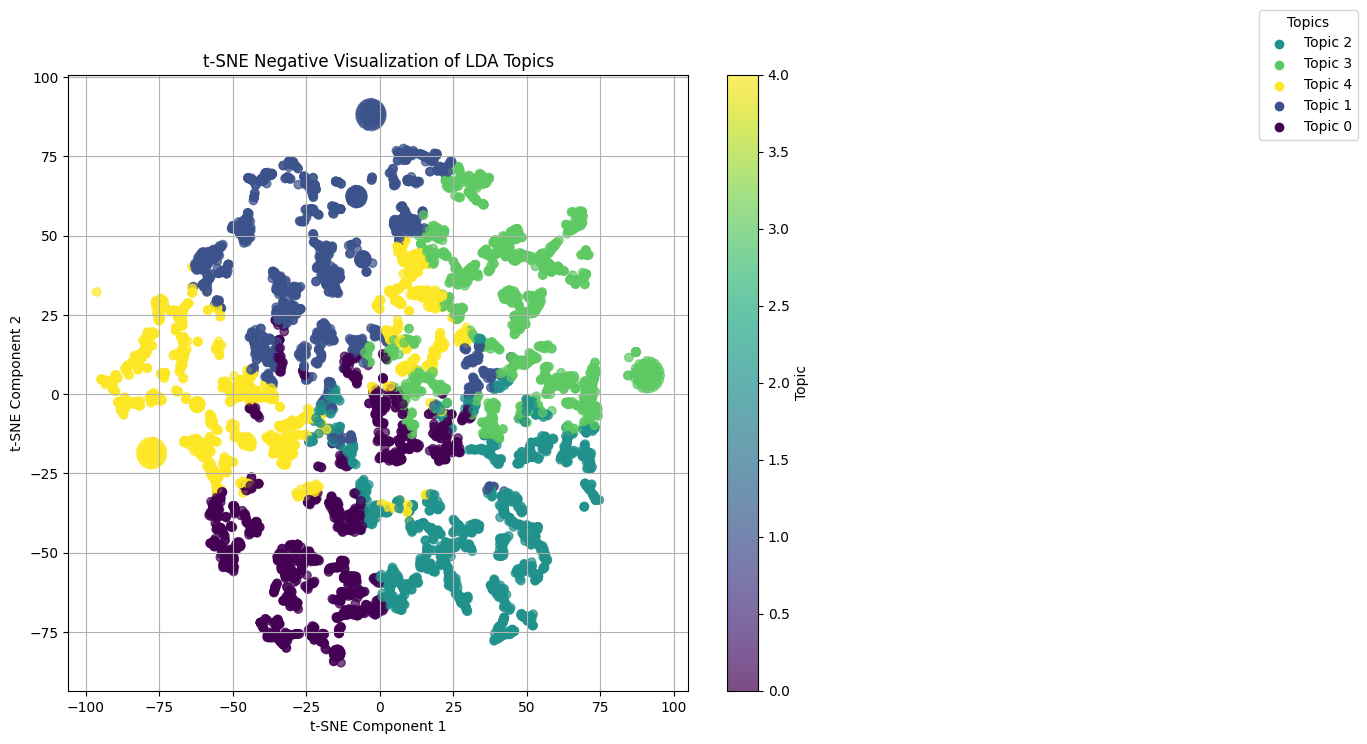

In [ ]:
# Step 4: Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(neg_tsne_df['x'], neg_tsne_df['y'], c=neg_tsne_df['topic'], cmap='viridis', alpha=0.7)

# Create custom legend
unique_topics = neg_tsne_df['topic'].unique()
for topic in unique_topics:
    plt.scatter([], [], c=scatter.cmap(scatter.norm(topic)), label=f'Topic {topic}')


plt.title('t-SNE Negative Visualization of LDA Topics')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, label='Topic')
# Shift the legend position
plt.legend(title='Topics', loc='center', bbox_to_anchor=(2, 1), borderaxespad=0.)
plt.grid(True)
plt.show()

# Evaulate negative LDA model

In [ ]:
Negative_predicted_labels = negative_topic_distribution.argmax(axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Step 4: Convert cleaned text to numerical labels
# Assuming each unique cleaned text represents a different category
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Make sure to fit on the actual labels
negative_true_labels = label_encoder.fit_transform(negative_tweets)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score, homogeneity_completeness_v_measure
from sklearn.metrics import silhouette_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Negative Clustering Evaluation
nmi = normalized_mutual_info_score(negative_true_labels, Negative_predicted_labels)
ari = adjusted_rand_score(negative_true_labels, Negative_predicted_labels)
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(negative_true_labels, Negative_predicted_labels)
silhouette = silhouette_score(negative_topic_distribution, Negative_predicted_labels)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Step 7: Print Negative Evaluation Metrics
print("Negative LDA Evaluation Metrics:")
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")
print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Homogeneity: {homogeneity:.4f}, Completeness: {completeness:.4f}, V-measure: {v_measure:.4f}")
print(f"Silhouette Score: {silhouette:.4f}")

Negative LDA Evaluation Metrics:
Normalized Mutual Information (NMI): 0.3001
Adjusted Rand Index (ARI): 0.0000
Homogeneity: 0.1766, Completeness: 1.0000, V-measure: 0.3001
Silhouette Score: 0.3702


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
from gensim import corpora
from gensim.models import CoherenceModel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Step 7: Function to calculate coherence score for LDA model
def calculate_coherence_lda(model, texts, vectorizer):
    # Extract the topic-word matrix
    topic_word_matrix = model.components_
    num_topics = topic_word_matrix.shape[0]

    # Create a list to hold the words for each topic
    topic_words = []
    feature_names = vectorizer.get_feature_names_out()  # Use the vectorizer to get feature names
    for topic_id in range(num_topics):
        topic_words.append([feature_names[i] for i in topic_word_matrix[topic_id].argsort()[:-11:-1]])  # Top 10 words

    # Create a Gensim dictionary
    dictionary = corpora.Dictionary()
    tokenized_texts = [text.split() for text in texts]
    dictionary.add_documents(tokenized_texts)

    # Calculate coherence score
    coherence_model = CoherenceModel(topics=topic_words, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    return coherence_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Step 8: Calculate the coherence score for the best negative LDA model
negative_LDA_coherence_score = calculate_coherence_lda(negative_LDA_parm, negative_tweets_list, vectorizer)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Step 8: Calculate the coherence score for the best positive LDA model
positive_LDA_coherence_score = calculate_coherence_lda(best_pos_lda, positive_tweets_list, vectorizer)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Print the Negative coherence score
print(f"Coherence Score for Best Negative LDA Model: {negative_LDA_coherence_score:.4f}")

Coherence Score for Best Negative LDA Model: 0.3383


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Print the Positive coherence score
print(f"Coherence Score for Best Positive LDA Model: {positive_LDA_coherence_score:.4f}")

Coherence Score for Best Positive LDA Model: 0.3674


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## FIT positive TFIDF to LDA

In [ ]:
# Positive TFIDF-Normalised
positive_tweets_normalized = normalize(positive_tweets_vectorized,norm='l2')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
search_params = {
    'n_components': [5, 10, 15],  # Number of topics (K)
    'doc_topic_prior': [0.1, 0.5, 1.0],  # Alpha (ɑ) - Document-Topic density
    'topic_word_prior': [0.01, 0.1, 0.5],  # Beta (β) - Topic-Word density
    'learning_decay': [0.5, 0.7, 0.9],
    'learning_offset': [10.0, 20.0, 30.0],
    'max_iter': [10, 20, 30]  # Number of iterations for convergence
}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Step 6: Initialize postiive LDA model
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import RandomizedSearchCV
for i in range(5):  # Example: testing 5 different random states
    positive_lda = LatentDirichletAllocation(random_state=i)
    lda.fit(positive_tweets_normalized)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Initialize RandomizedSearchCV
random_search_pos = RandomizedSearchCV(
    lda,
    param_distributions=search_params,
    n_iter=5,  # Number of parameter settings to sample
    n_jobs=-1,  # Use all available cores
    cv=3,  # Cross-validation
    verbose=1,
    random_state=42
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
random_search_pos.fit(positive_tweets_normalized)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



RandomizedSearchCV(cv=3, estimator=LatentDirichletAllocation(random_state=4),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'doc_topic_prior': [0.1, 0.5, 1.0],
                                        'learning_decay': [0.5, 0.7, 0.9],
                                        'learning_offset': [10.0, 20.0, 30.0],
                                        'max_iter': [10, 20, 30],
                                        'n_components': [5, 10, 15],
                                        'topic_word_prior': [0.01, 0.1, 0.5]},
                   random_state=42, verbose=1)

In [ ]:
# Get the best parameters
best_pos_params = random_search_pos.best_params_
print("Best Positive LDA Parameters:")
print(best_pos_params)

Best Positive LDA Parameters:
{'topic_word_prior': 0.5, 'n_components': 15, 'max_iter': 20, 'learning_offset': 30.0, 'learning_decay': 0.5, 'doc_topic_prior': 0.1}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Best Positive LDA model
best_pos_lda = random_search_pos.best_estimator_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
print(best_pos_lda)

LatentDirichletAllocation(doc_topic_prior=0.1, learning_decay=0.5,
                          learning_offset=30.0, max_iter=20, n_components=15,
                          random_state=4, topic_word_prior=0.5)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Print the topics
topic_words = {}
for idx, topic in enumerate(best_pos_lda.components_):
    top_feature_indices = topic.argsort()[-5:][::-1]  # Get top 5 terms for each topic
    topic_words[idx] = [vectorizer.get_feature_names_out()[i] for i in top_feature_indices]
    print(f"Topic {idx + 1}: {', '.join(topic_words[idx])}")

Topic 1: bag, wait, hrs, use, check
Topic 2: tell, flightle, americanair, flightr, hang
Topic 3: tomorrow, make, response, long, good
Topic 4: plane, connection, crew, flight, cancel flight
Topic 5: jetblue, know, seat, guy, way
Topic 6: gate, agent, luggage, airport, customer service
Topic 7: travel, trip, seat, let, southwestair
Topic 8: customer, home, people, baggage, help
Topic 9: usairways, ua, unite, seat, hold hour
Topic 10: amp, answer, seat, service, try
Topic 11: really, come, late flightr, good, guy
Topic 12: airline, board, lose, miss, really
Topic 13: like, look, ticket, really, problem
Topic 14: reservation, really, seat, yes, phone
Topic 15: united, hold, leave, usairway, send


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Visualise positive Latent Dirichlet Allocation
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Step 1: Obtain topic distributions
pos_topic_distribution = best_pos_lda.transform(positive_tweets_normalized)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Step 2: Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
pos_tsne_results = tsne.fit_transform(pos_topic_distribution)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Step 3: Create a DataFrame for visualization
tsne_df_pos = pd.DataFrame(pos_tsne_results, columns=['x', 'y'])
tsne_df_pos['topic'] = pos_topic_distribution.argmax(axis=1)  # Assign the topic with the highest probability

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



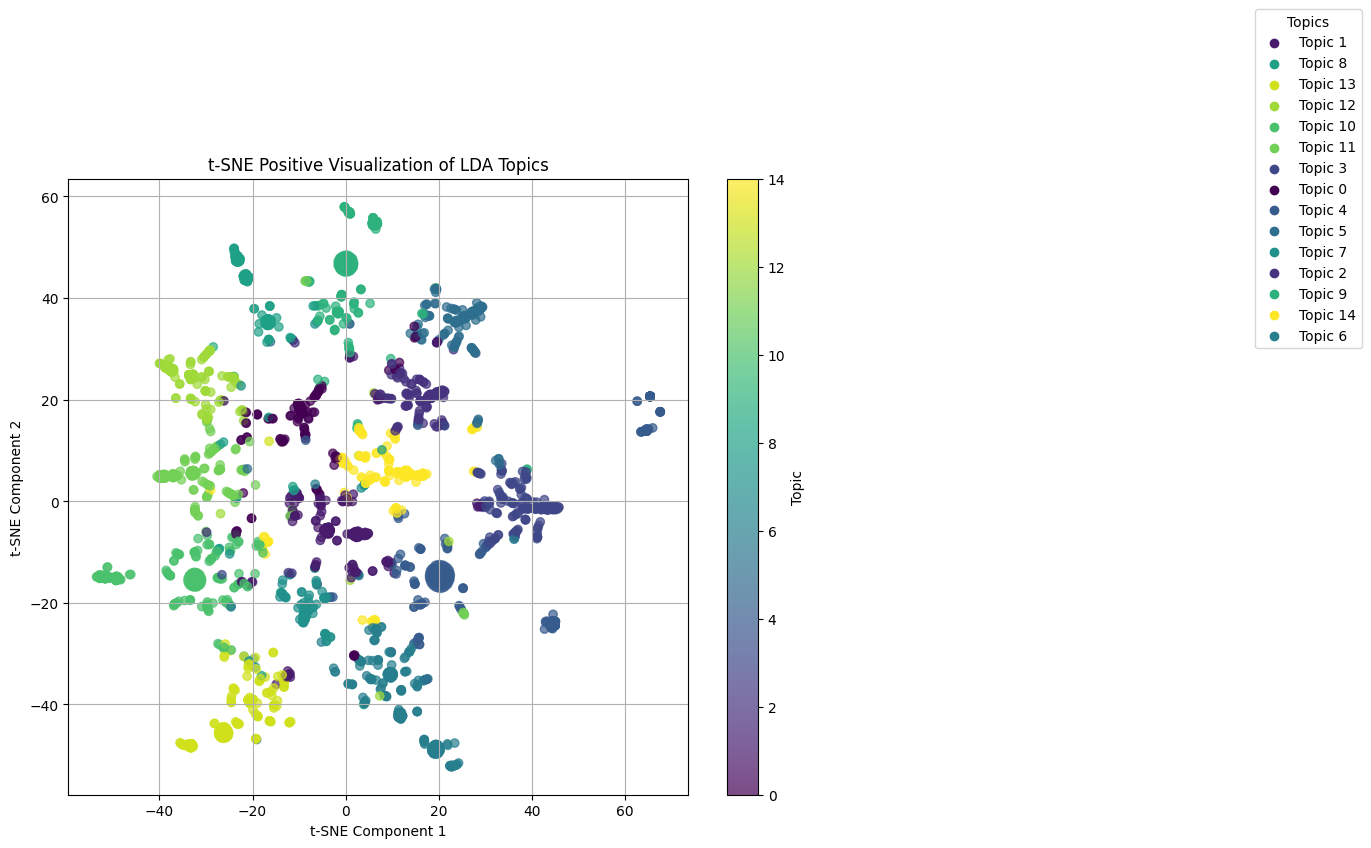

In [ ]:
# Step 4: Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_df_pos['x'], tsne_df_pos['y'], c=tsne_df_pos['topic'], cmap='viridis', alpha=0.7)

# Create custom legend
unique_topics = tsne_df_pos['topic'].unique()
for topic in unique_topics:
    plt.scatter([], [], c=scatter.cmap(scatter.norm(topic)), label=f'Topic {topic}')


plt.title('t-SNE Positive Visualization of LDA Topics')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, label='Topic')
# Shift the legend position
plt.legend(title='Topics', loc='center', bbox_to_anchor=(2, 1), borderaxespad=0.)
plt.grid(True)
plt.show()

In [ ]:
from wordcloud import WordCloud
def plot_word_clouds(lda_model, feature_names, n_top_words=15,):
    for topic_idx, topic in enumerate(best_pos_lda.components_):
        # Get the top words for this topic
        top_words_indices = topic.argsort()[-n_top_words:][::-1]
        top_words = [feature_names[i] for i in top_words_indices]
        top_words_weights = topic[top_words_indices]

        # Create a dictionary for word cloud
        word_freq = {top_words[i]: top_words_weights[i] for i in range(n_top_words)}

        # Generate the word cloud
        plt.figure(figsize=(8, 4))
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

        # Display the word cloud
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Topic {topic_idx + 1}')
        plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Step to get feature names
feature_names = vectorizer.get_feature_names_out()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


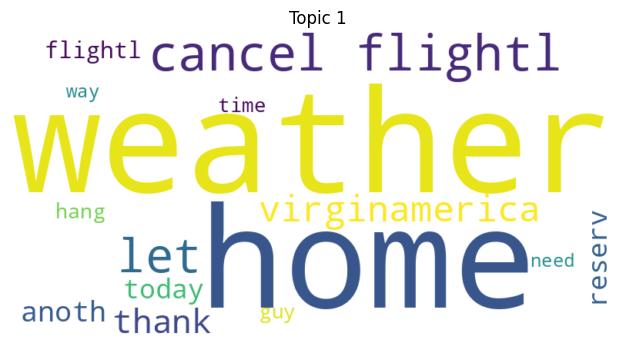

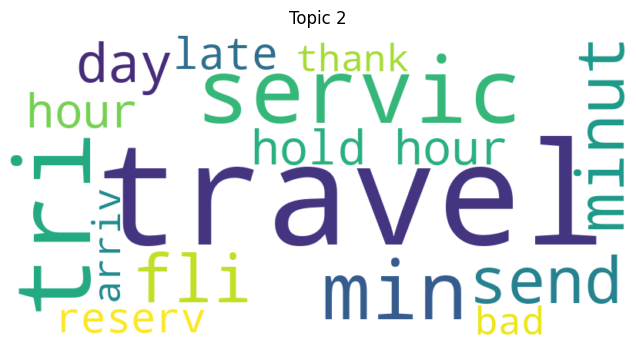

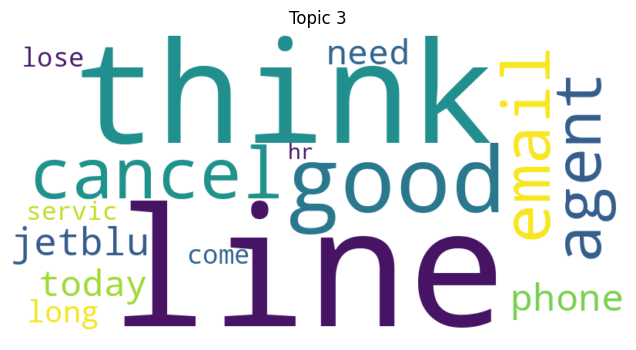

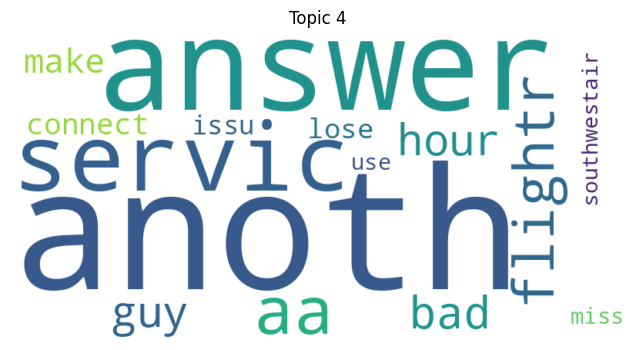

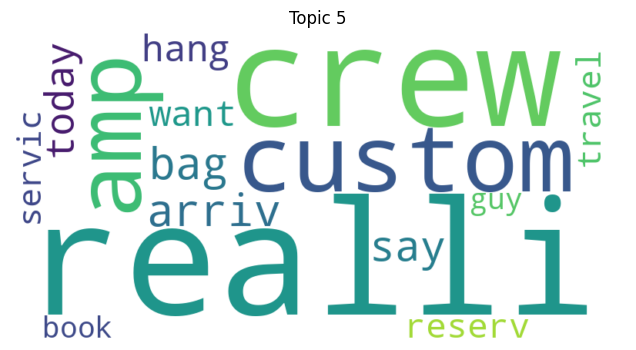

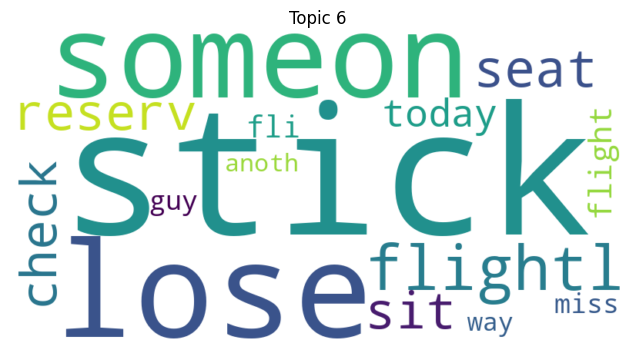

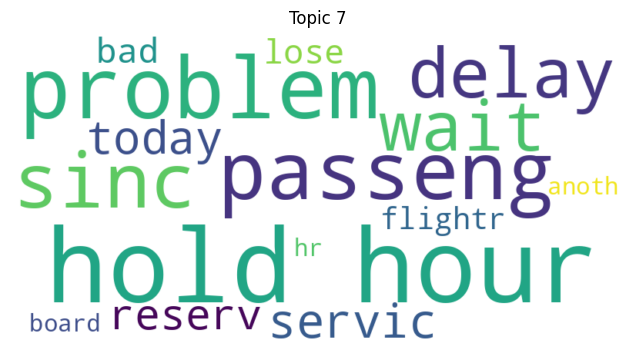

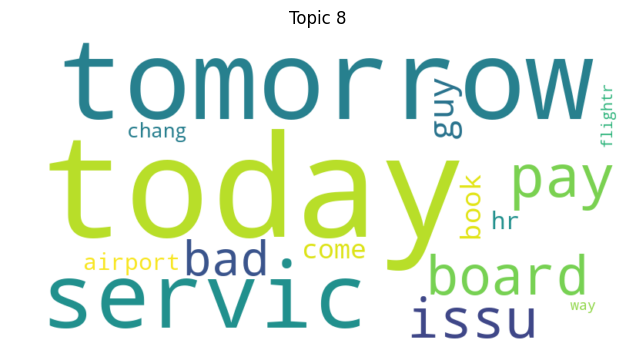

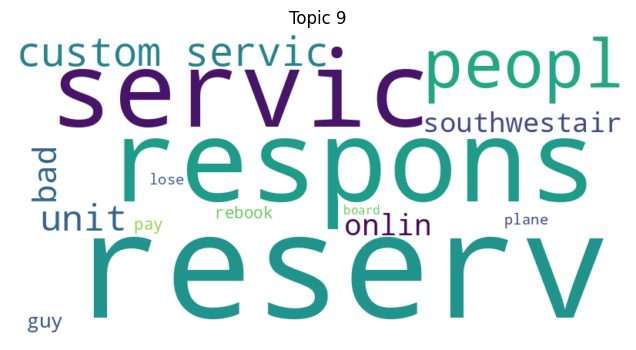

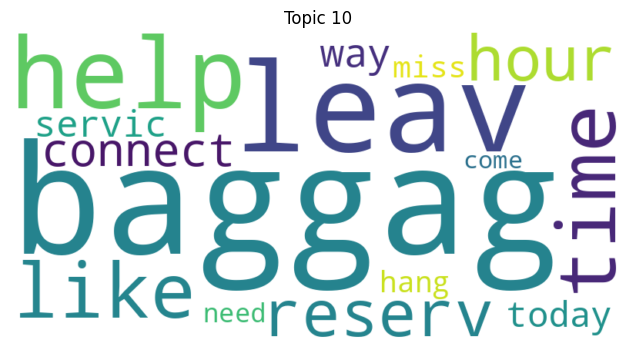

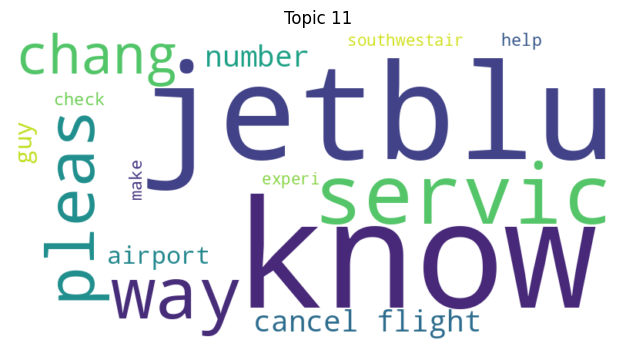

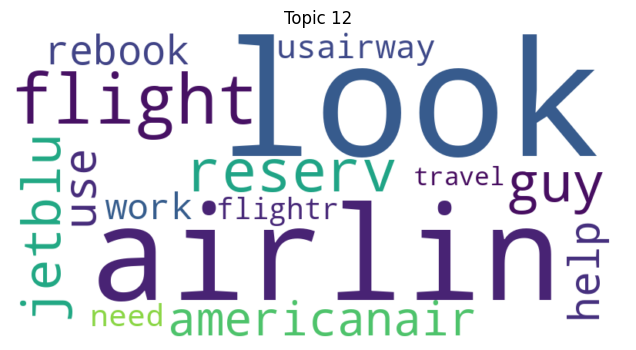

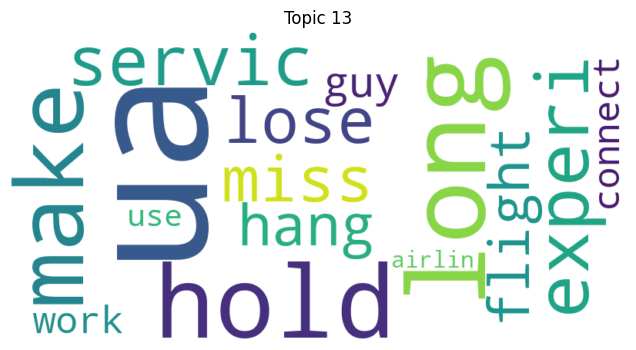

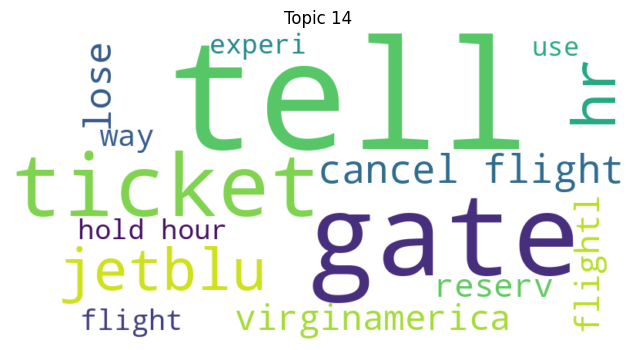

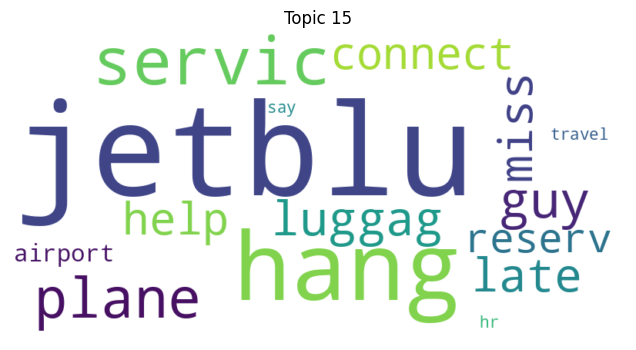

In [ ]:
# Plot word clouds for each topic
plot_word_clouds(best_pos_lda, feature_names,best_pos_params['n_components'])

In [ ]:
# Step 1: Load your DataFrame
positive_tweets = df_clean[df_clean['airline_sentiment'] == 'positive']['clean_text']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Step 2: Tokenize the negative tweets
pos_texts = [tweet.split() for tweet in positive_tweets]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Step 3: Create a dictionary and corpus
pos_dictionary = corpora.Dictionary(pos_texts)
pos_corpus = [pos_dictionary.doc2bow(text) for text in pos_texts]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Step 4: Train the LDA model using Gensim
num_topics = 15  # Based on your the best Paramaters
pos_lda_model = gensim.models.LdaModel(pos_corpus, num_topics=num_topics, id2word=pos_dictionary, passes=10, random_state=42)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Step 5: Visualize with pyLDAvis
vis_pos_lda = pyLDAvis.gensim_models.prepare(pos_lda_model, pos_corpus, pos_dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Display the visualization
pyLDAvis.enable_notebook()
pyLDAvis.display(vis_pos_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Evaulate the positive LDA model
# Step 3: Get predicted topics
pos_predicted_labels = pos_topic_distribution.argmax(axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Step 4: Convert cleaned text to numerical labels
# Assuming each unique cleaned text represents a different category
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
positive_true_labels = label_encoder.fit_transform(positive_tweets)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# positive LDA Clustering Evaluation
nmi = normalized_mutual_info_score(positive_true_labels, pos_predicted_labels)
ari = adjusted_rand_score(positive_true_labels, pos_predicted_labels)
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(positive_true_labels, pos_predicted_labels)
silhouette = silhouette_score(pos_topic_distribution, pos_predicted_labels)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Step 7: Print Positive Evaluation Metrics
print("Positive LDA Evaluation Metrics:")
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")
print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Homogeneity: {homogeneity:.4f}, Completeness: {completeness:.4f}, V-measure: {v_measure:.4f}")
print(f"Silhouette Score: {silhouette:.4f}")

Positive LDA Evaluation Metrics:
Normalized Mutual Information (NMI): 0.5214
Adjusted Rand Index (ARI): 0.0102
Homogeneity: 0.3526, Completeness: 1.0000, V-measure: 0.5214
Silhouette Score: 0.4994


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Scores
lda_coherence = [0.36, 0.34]  # Positive, Negative
bertopic_coherence = [0.34, 0.38]  # Positive, Negative

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Bar positions
labels = ['Positive', 'Negative']
x = np.arange(len(labels))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Bar width
width = 0.2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



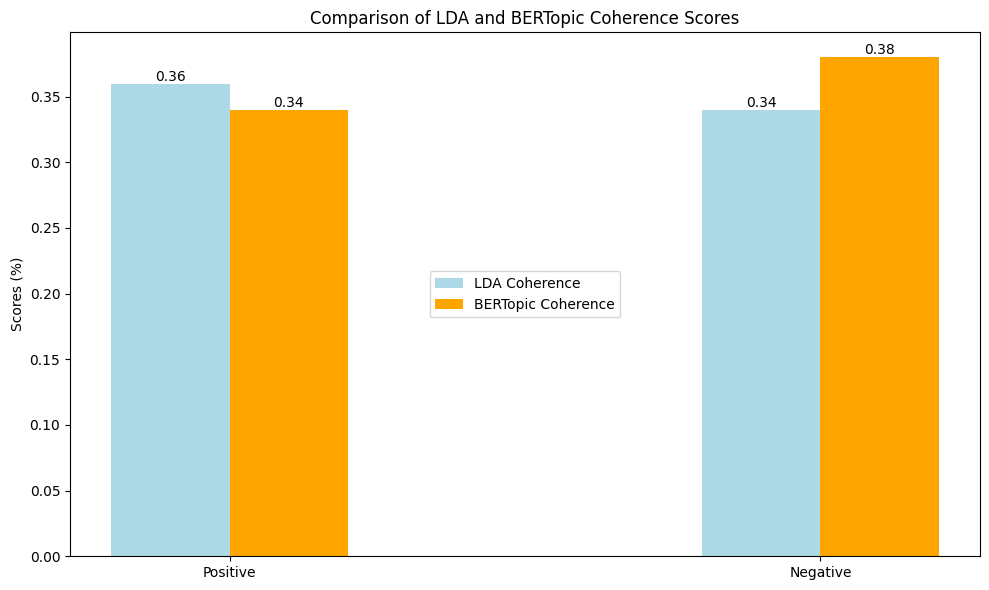

In [ ]:
# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting
bar1 = ax.bar(x - width/2, lda_coherence, width, label='LDA Coherence', color='lightblue')
bar2 = ax.bar(x + width/2, bertopic_coherence, width, label='BERTopic Coherence', color='orange')


# Labels and title
ax.set_ylabel('Scores (%)')
ax.set_title('Comparison of LDA and BERTopic Coherence Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')  # Center the legend

# Annotate scores
for i in range(len(labels)):
    ax.annotate(f'{lda_coherence[i]:.2f}',
                xy=(x[i] - width/2, lda_coherence[i]),
                ha='center', va='bottom', color='black')

    ax.annotate(f'{bertopic_coherence[i]:.2f}',
                xy=(x[i] + width/2, bertopic_coherence[i]),
                ha='center', va='bottom', color='black')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# silhouette score
lda_silhouette_score = [0.50, 0.39]  # Positive, Negative
bertopic_silhouette_score = [0.11, 0.05]  # Positive, Negative

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Bar positions
labels = ['Positive', 'Negative']
x = np.arange(len(labels))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



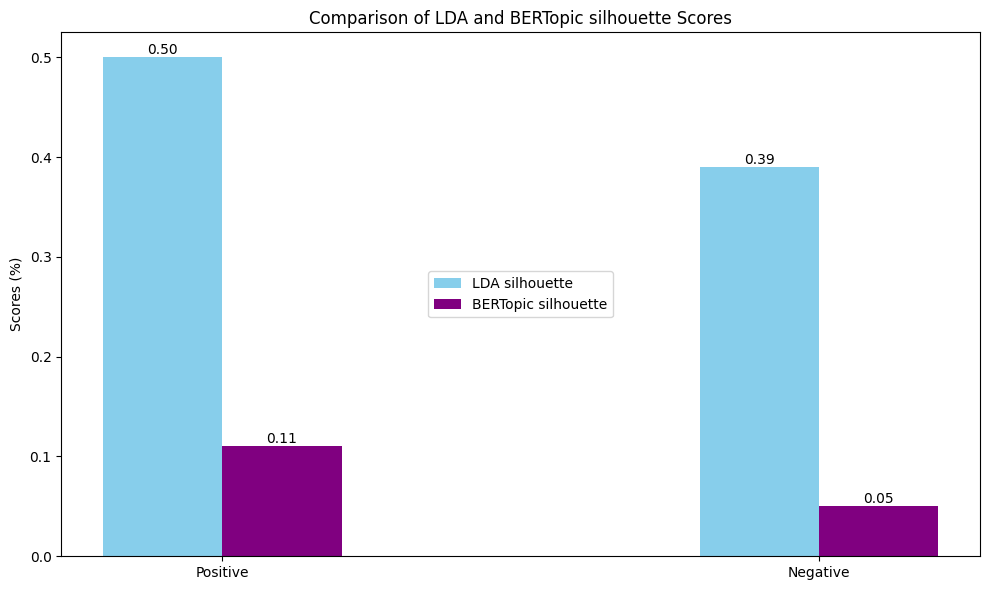

In [ ]:
# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting
bar1 = ax.bar(x - width/2, lda_silhouette_score, width, label='LDA silhouette', color='skyblue')
bar2 = ax.bar(x + width/2, bertopic_silhouette_score, width, label='BERTopic silhouette', color='purple')


# Labels and title
ax.set_ylabel('Scores (%)')
ax.set_title('Comparison of LDA and BERTopic silhouette Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')  # Center the legend

# Annotate scores
for i in range(len(labels)):
    ax.annotate(f'{lda_silhouette_score[i]:.2f}',
                xy=(x[i] - width/2, lda_silhouette_score[i]),
                ha='center', va='bottom', color='black')

    ax.annotate(f'{bertopic_silhouette_score[i]:.2f}',
                xy=(x[i] + width/2, bertopic_silhouette_score[i]),
                ha='center', va='bottom', color='black')

# Show the plot
plt.tight_layout()
plt.show()